In [ ]:
# import needed packages

import pandas as pd
import sqlite3

# load two csv files directly from github repo

sales = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/opioidPrescriptionSales.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/drugPoisoningDeaths.csv")

# Establish a connection to the SQLite database
conn = sqlite3.connect('data/opiods.db')

# Write the DataFrames to the database
deaths.to_sql('deaths', conn, if_exists='replace', index=False)
sales.to_sql('sales', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()


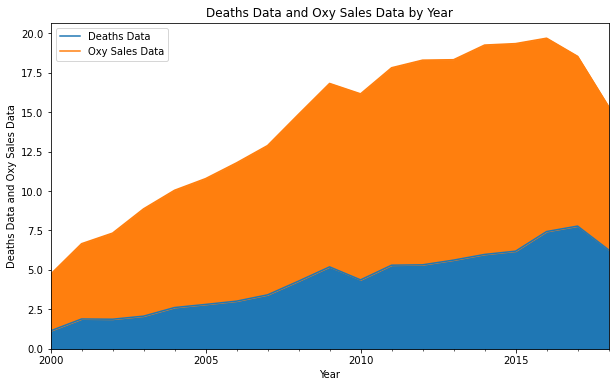

In [5]:
# Connect to the SQLite database
conn = sqlite3.connect('data/opiods.db')

# join deaths and sales table, query for just MN and Oxycododone
query = "SELECT deaths.Fips, deaths.Location, deaths.[TimeFrame], deaths.[Drug Type], " \
        "deaths.Data as deaths_data, sales.Data as oxy_sales_data " \
        "FROM deaths " \
        "INNER JOIN sales ON sales.Fips = deaths.Fips and sales.TimeFrame = deaths.TimeFrame " \
        "WHERE [Drug Type] = 'All opioids' and deaths.Location = 'Minnesota'" \
        "AND [Oxycodone / Hydrocodone] = 'Oxycodone' " \
        "ORDER BY deaths.Location, deaths.TimeFrame"


# load into df
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()


import matplotlib.pyplot as plt
# Convert the TimeFrame column to datetime format
df['TimeFrame'] = pd.to_datetime(df['TimeFrame'], format='%Y')
df.drop('Fips', axis=1, inplace=True)

# Set the TimeFrame column as the index
df.set_index('TimeFrame', inplace=True)




# plot sales per 10,000 and death by 10,000
df.plot(kind='area', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Deaths Data and Oxy Sales Data')
plt.title('Deaths Data and Oxy Sales Data by Year')
plt.legend(['Deaths Data', 'Oxy Sales Data'])
plt.show()